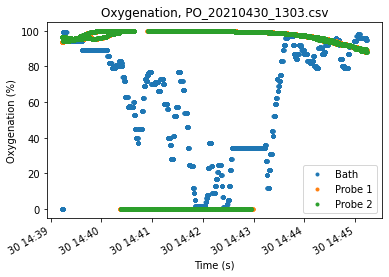

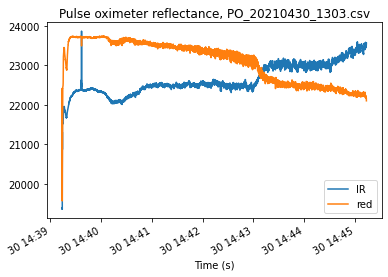

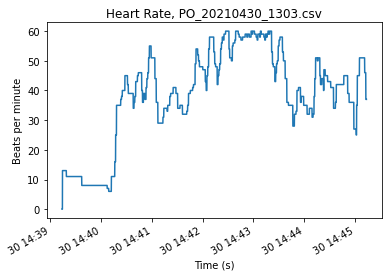

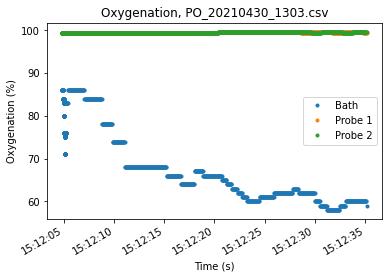

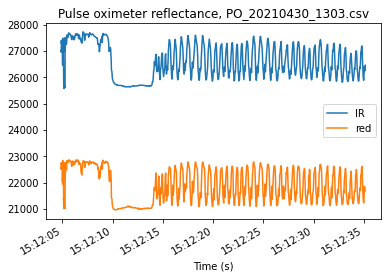

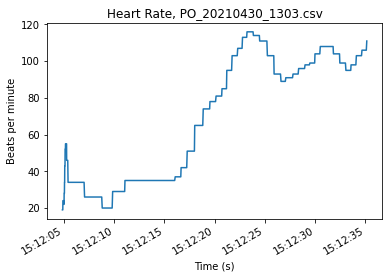

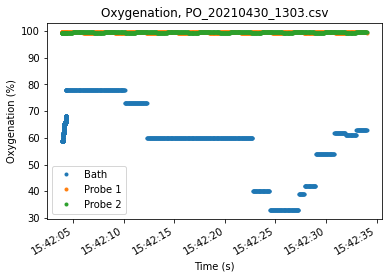

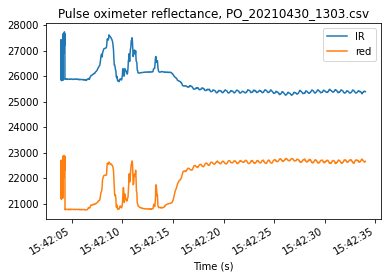

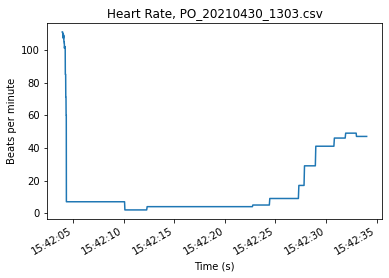

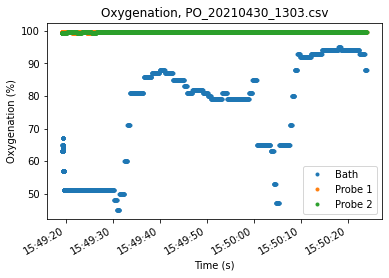

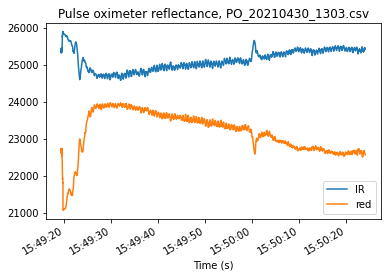

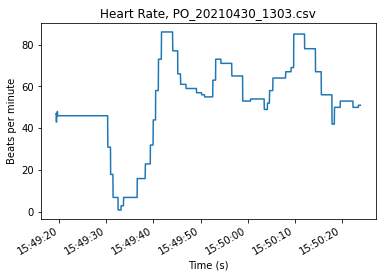

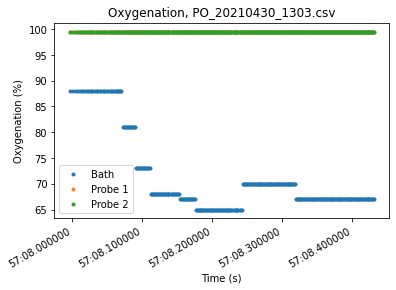

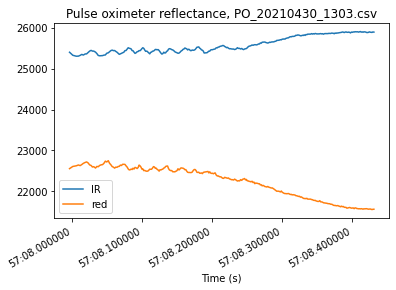

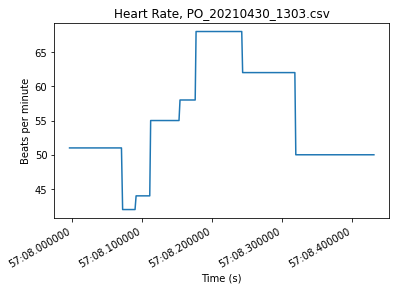

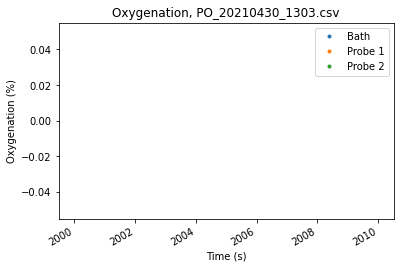

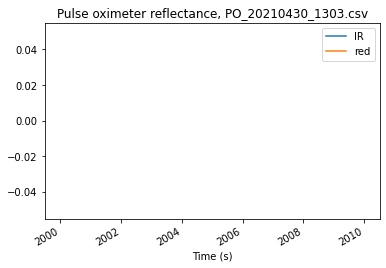

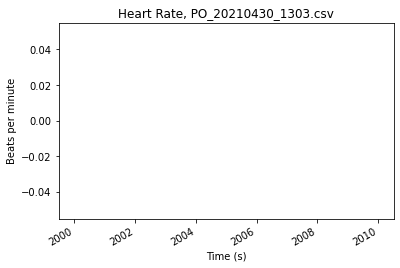

In [60]:
import pandas as pd
import time
import matplotlib.pyplot as plt
directory = 'Logs/'

def severinghoouse(x):
    if x == 0:
        return 0
    return ((((x**3+150*x)**-1 * 23400)+1)**-1) * 100

#name = 'PO_20210430_1303.csv'
names = ['PO_20210430_1545.csv', 'PO_20210430_1612.csv', 'PO_20210430_1642.csv', 'PO_20210430_1650.csv', 'PO_20210430_1700.csv', 'PO_20210430_1713.we   csv']
dfs = [pd.read_csv(directory+name) for name in names]

for df in dfs:
    df['timestamp'] = pd.to_datetime(df['time'], unit='s')
    df['so2_1'] = df['p1'].apply(severinghoouse)
    df['so2_2'] = df['p2'].apply(severinghoouse)

def analyze(i, d):

    #if i==0:
    #    d = d.iloc[4000:5000, :]

    plt.figure()
    plt.title(f'Oxygenation, {name}')
    plt.plot(d['timestamp'], d['SPO2Avg'], '.')
    plt.plot(d['timestamp'], d['so2_1'], '.')
    plt.plot(d['timestamp'], d['so2_2'], '.')
    plt.legend(['Bath', 'Probe 1', 'Probe 2'])
    plt.xlabel('Time (s)')
    plt.ylabel('Oxygenation (%)')

    plt.gcf().autofmt_xdate()

    plt.figure()
    plt.title(f'Pulse oximeter reflectance, {name}')
    plt.plot(d['timestamp'], d['i'])
    plt.plot(d['timestamp'], d['r'])
    plt.legend(['IR', 'red'])
    plt.xlabel('Time (s)')
    plt.gcf().autofmt_xdate()

    plt.figure()
    plt.title(f'Heart Rate, {name}')
    plt.plot(d['timestamp'], d['rollHrAvg'])
    plt.xlabel('Time (s)')
    plt.ylabel('Beats per minute')
    plt.gcf().autofmt_xdate()

ds = dfs

#ds[0] = ds[0].iloc[4000:5000,:]

for i, d in enumerate(ds):
    analyze(i, d)